# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [ ]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [ ]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

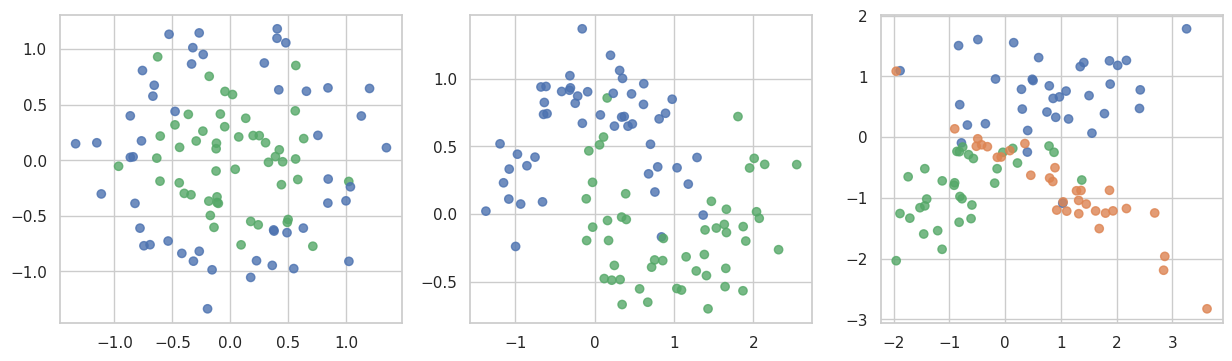

In [ ]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [ ]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

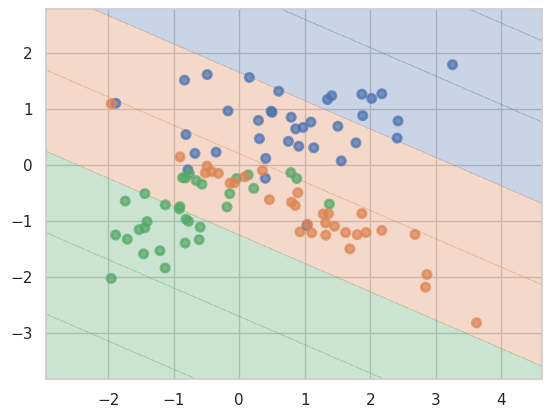

In [ ]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = [], [], [], []

for i in range(len(datasets)):
  Xi_train, Xi_test, yi_train, yi_test = train_test_split(datasets[i][0], datasets[i][1], test_size = 0.2, random_state = 1231)
  X_train.append(Xi_train)
  X_test.append(Xi_test)
  y_train.append(yi_train)
  y_test.append(yi_test)

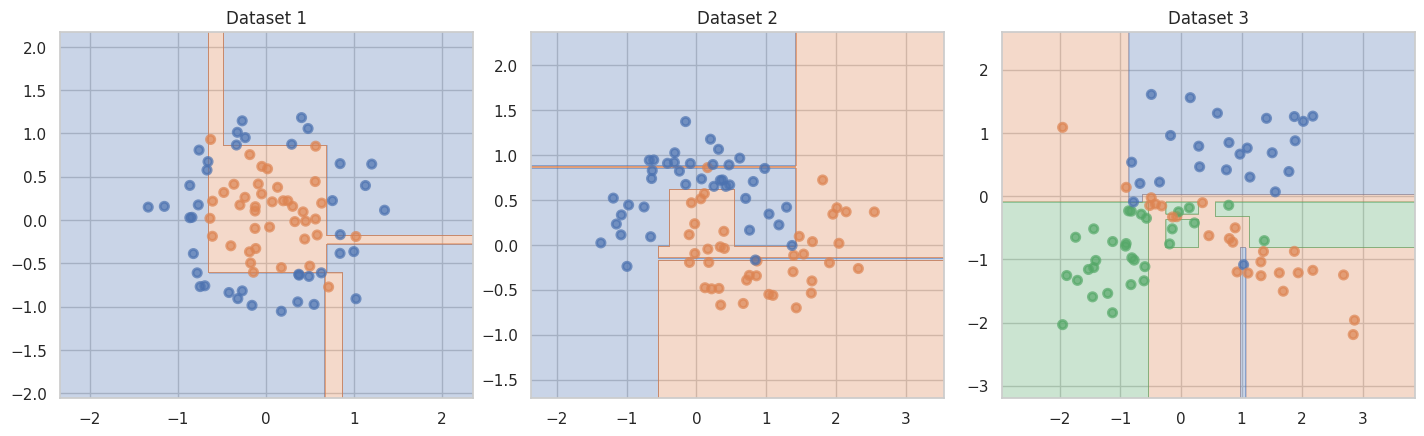

In [ ]:
accuracy = [[] for _ in range(len(datasets))]
plt.figure(figsize=(15,5))
for i in range(len(datasets)):
  tree = DecisionTreeClassifier().fit(X_train[i], y_train[i])

  pred_train = tree.predict(X_train[i])
  train_acc = accuracy_score(y_train[i], pred_train)
  pred_test = tree.predict(X_test[i])
  test_acc = accuracy_score(y_test[i], pred_test)

  accuracy[i].append(train_acc)
  accuracy[i].append(test_acc)

  plt.subplot(1, 3, i + 1)
  plot_surface(tree, X_train[i], y_train[i])
  plt.title(f"Dataset {i+1}");

In [ ]:
for i in range(len(accuracy)):
  print("Accuracy on train for", i+1, "dataset is", accuracy[i][0])
  print("Accuracy on test for", i+1, "dataset is", accuracy[i][1], '\n')

Accuracy on train for 1 dataset is 1.0
Accuracy on test for 1 dataset is 0.65 

Accuracy on train for 2 dataset is 1.0
Accuracy on test for 2 dataset is 0.95 

Accuracy on train for 3 dataset is 1.0
Accuracy on test for 3 dataset is 0.8 



__Ответ:__ на трейнах везде accuracy 1, а на тестах в первом сильно меньше, во втором не очень сильно, на третьем тоже меньше, значит, переобучились сильно достаточно

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def change_depth_leaf(X_train_inpt, y_train_inpt, X_test_inpt, y_test_inpt):

  plt.figure(figsize = (14,14))
  max_depth_arr = np.arange(1, 6, 1)
  min_samples_leaf_arr = np.arange(1, 6, 1)

  for i, depth in enumerate(max_depth_arr):
    for j, leaf in enumerate(min_samples_leaf_arr):
      tree = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = leaf, random_state=42)
      tree.fit(X_train_inpt, y_train_inpt)

      pred_train = tree.predict(X_train_inpt)
      train_acc = accuracy_score(y_train_inpt, pred_train)
      pred_test = tree.predict(X_test_inpt)
      test_acc = accuracy_score(y_test_inpt, pred_test)

      plt.subplot2grid((len(max_depth_arr), len(min_samples_leaf_arr)), (i, j))
      plot_surface(tree, X_train_inpt, y_train_inpt)
      plt.title('max_depth = ' + str(depth) + '\n' + 'min_samples_leaf = ' + str(leaf) + '\n' + 'train accuracy = ' + str(train_acc) + '\n' + 'test_accuracy = ' + str(test_acc))

Датасет 1:

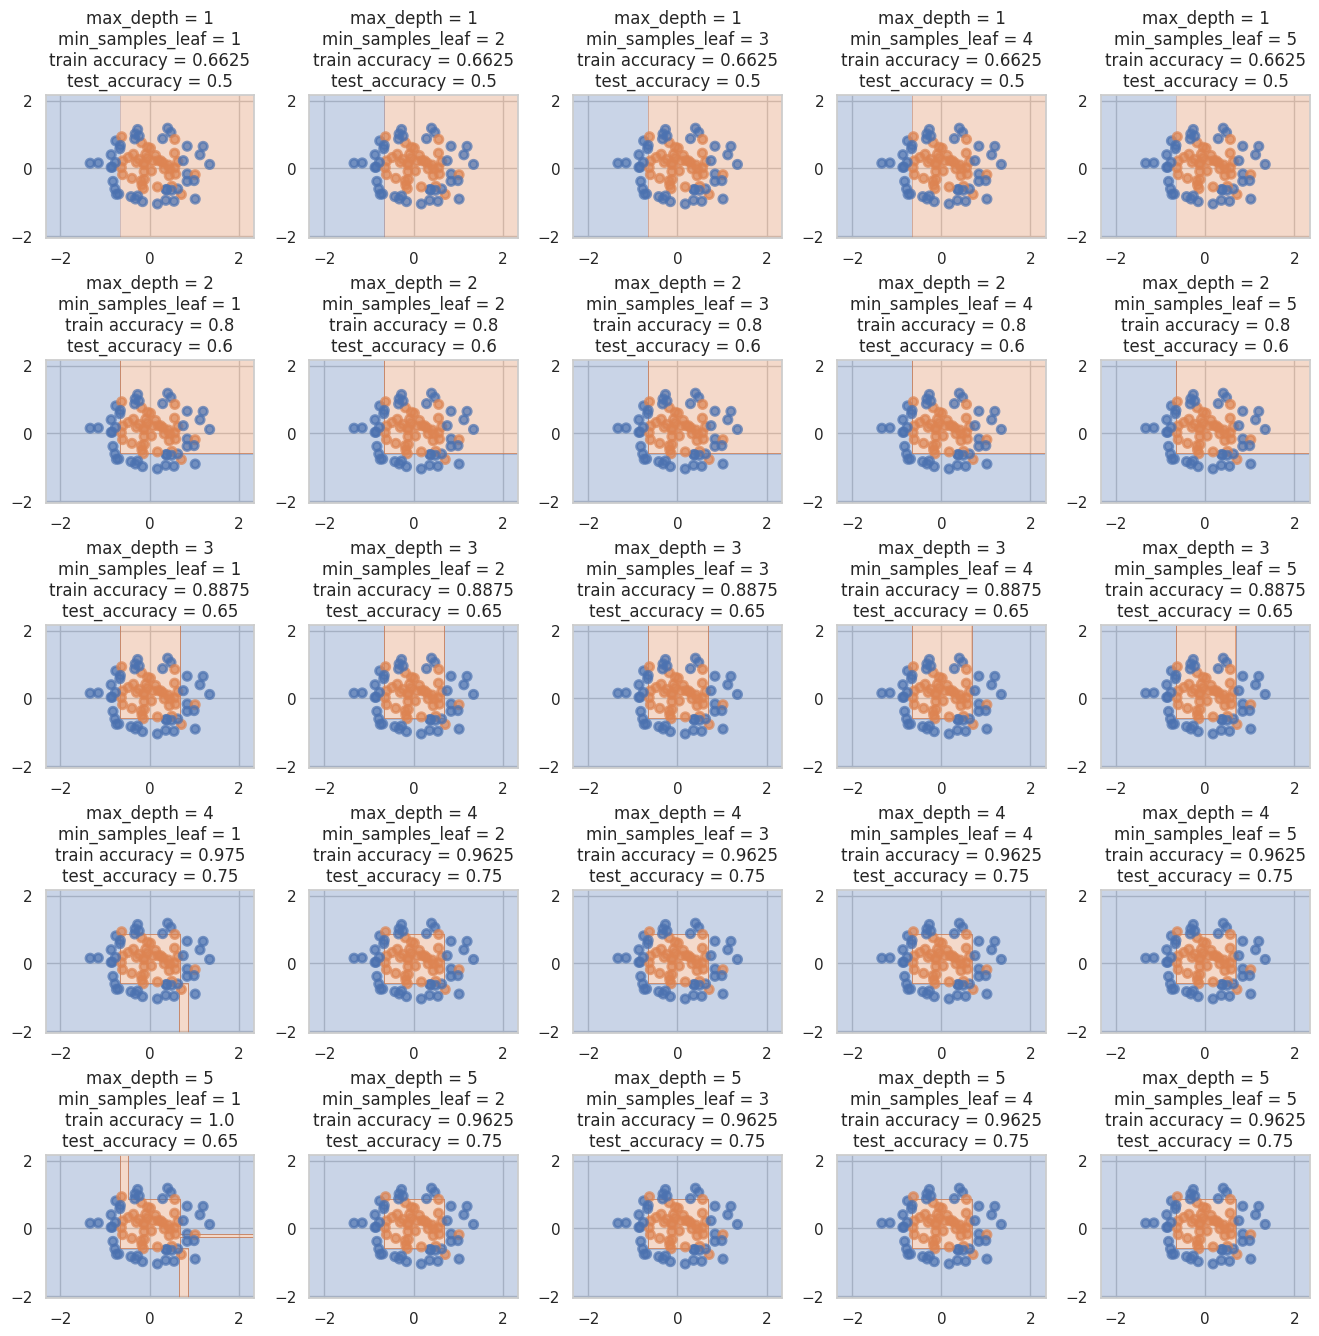

In [ ]:
change_depth_leaf(X_train[0], y_train[0], X_test[0], y_test[0])

Датасет 2:

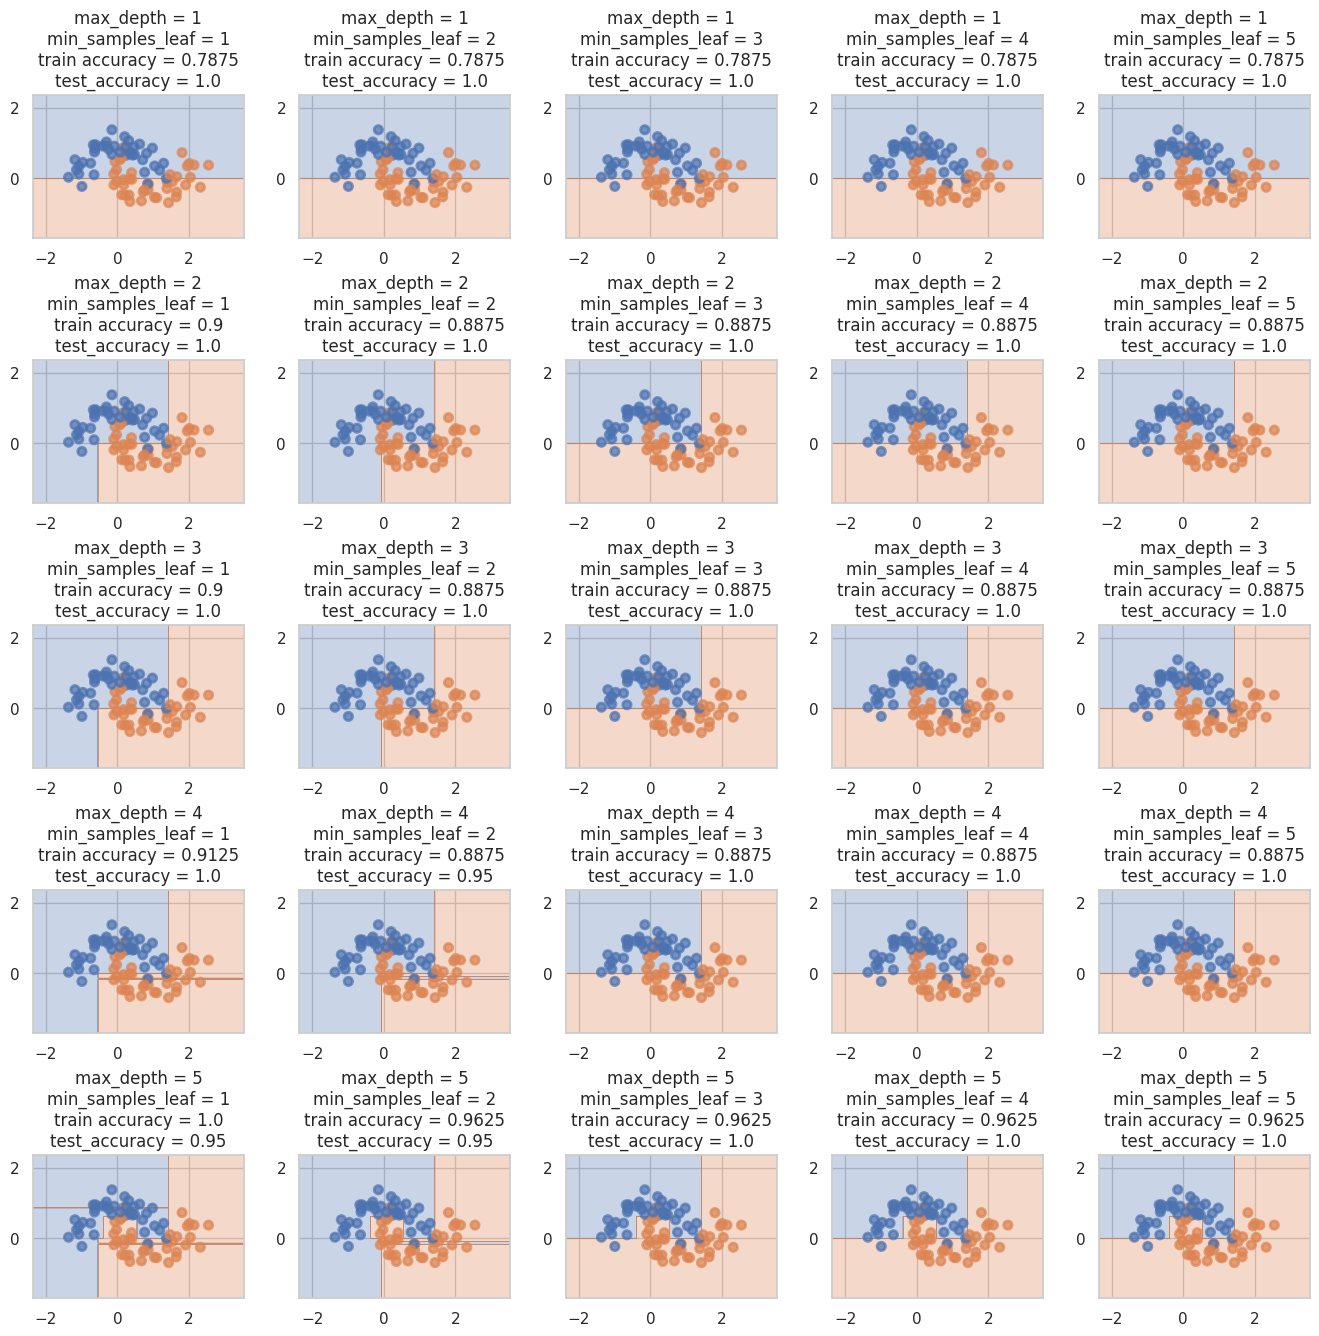

In [ ]:
change_depth_leaf(X_train[1], y_train[1], X_test[1], y_test[1])

Датасет 3:

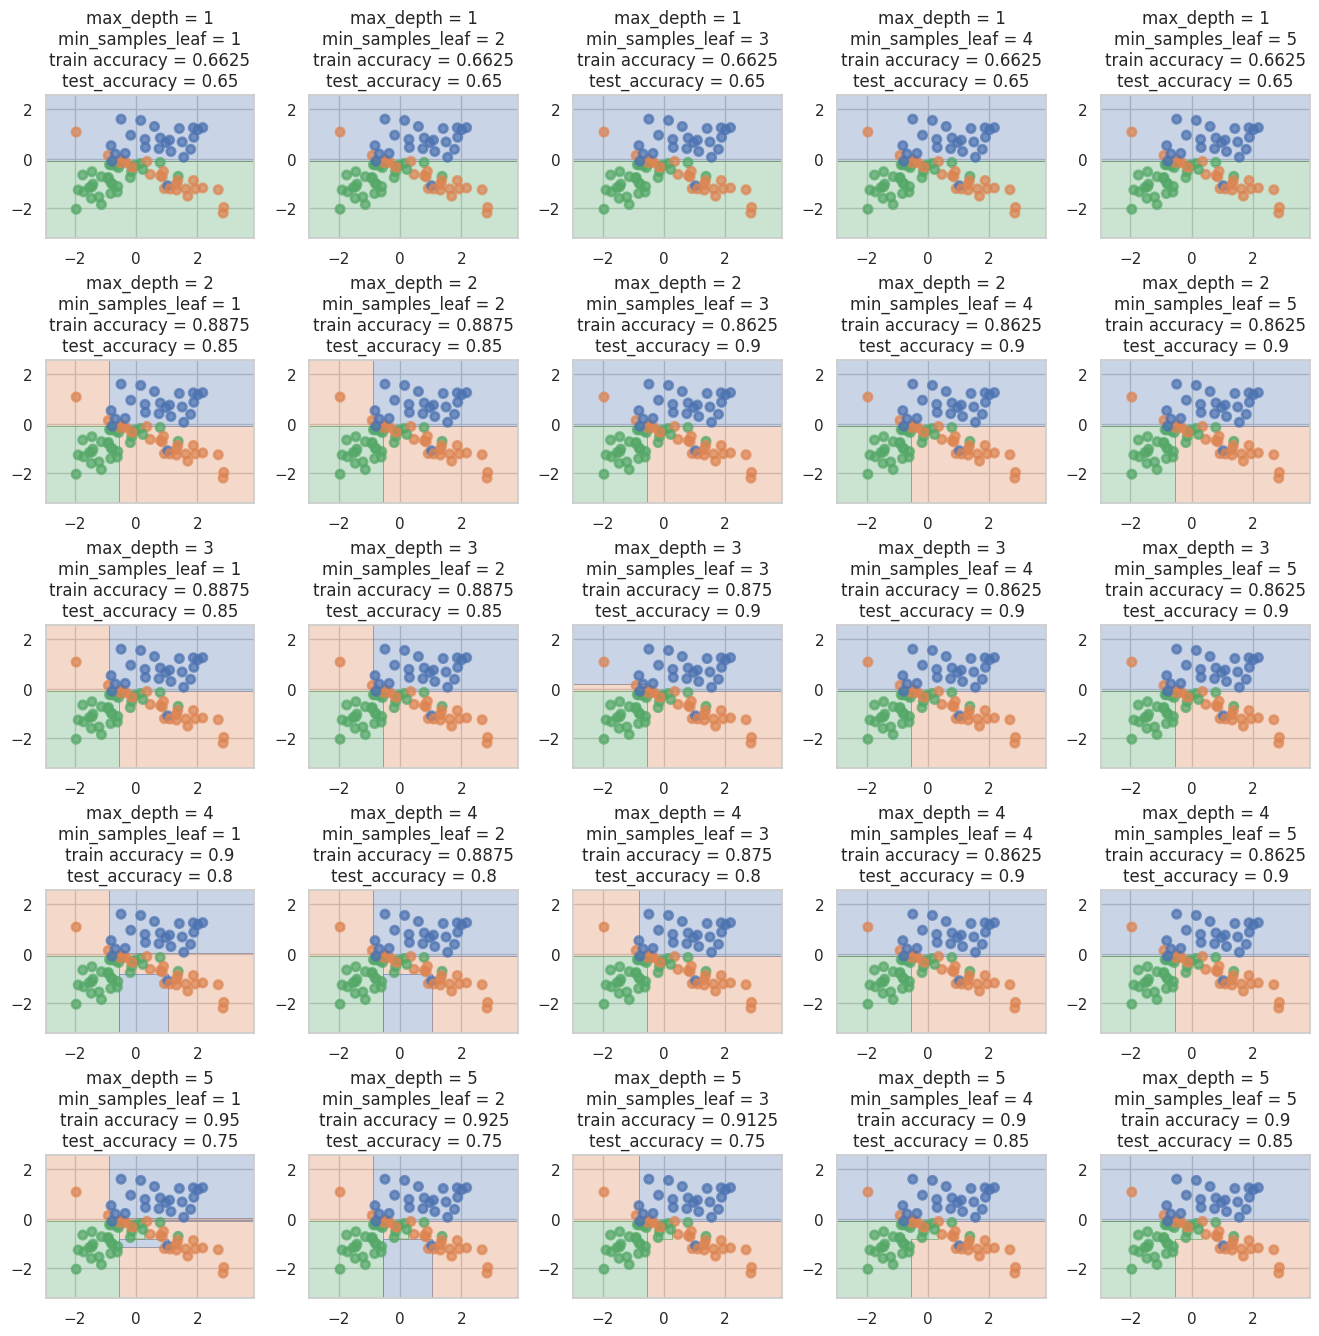

In [ ]:
change_depth_leaf(X_train[2], y_train[2], X_test[2], y_test[2])

__Ответ:__ в целом с увеличением глубины и изменением минимального количества листьев можно заметить усложнение разделяющей плоскости. Увеличение глубины способствует переобучению дерева, а минимальное количество листьев изменяет обобщающую способность. Для разных датасетов получается (логично) своя картинка, разные разделяющие плоскости, однако есть общая тенденция на её усложнение с ростом глубины и уменьшением минимального количества листьев

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

https://contest.yandex.ru/contest/56884/run-report/102927290/

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from hw5code import find_best_split
students = pd.read_csv('students.csv')
students.head(5)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [ ]:
features = students.drop('UNS', axis = 1)
target = students['UNS']
feat_cols = features.columns

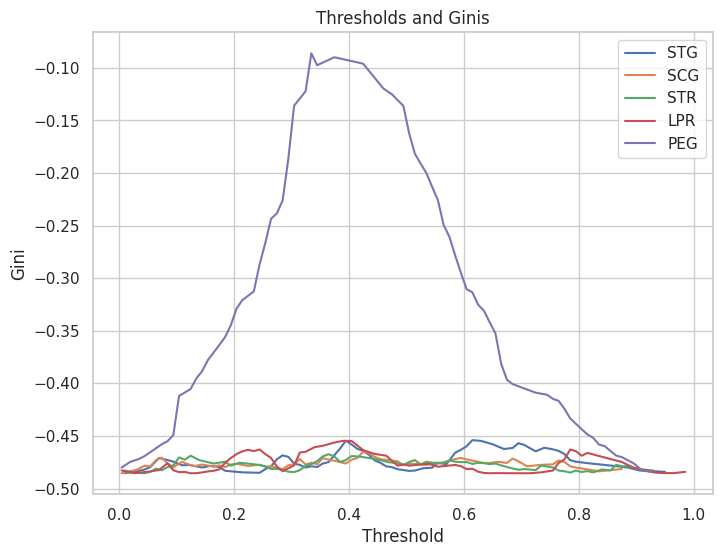

In [ ]:
plt.figure(figsize=(8,6))
for i in feat_cols:
  thresholds, ginis, treshold_best, gini_best = find_best_split(features[i].values, np.array(target))
  plt.plot(thresholds, ginis)
plt.legend(feat_cols)
plt.xlabel('Threshold')
plt.ylabel('Gini')
plt.title('Thresholds and Ginis');

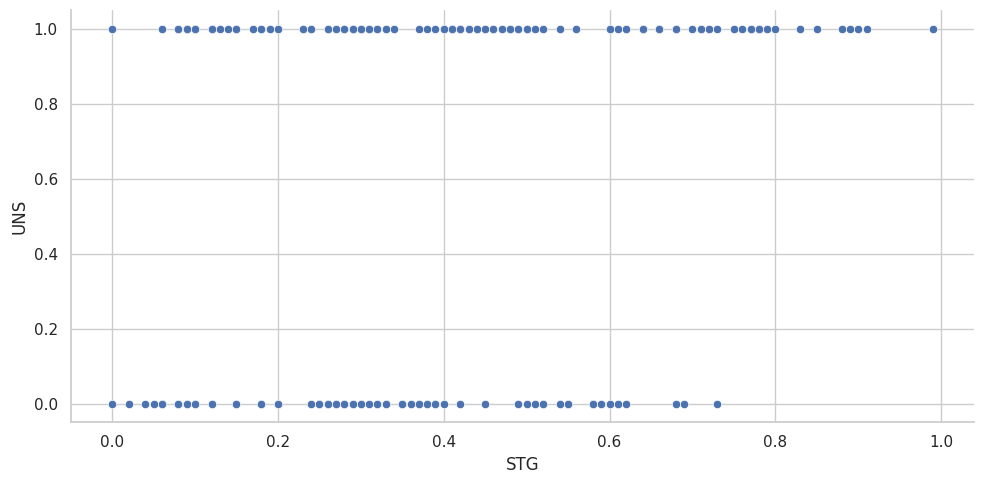

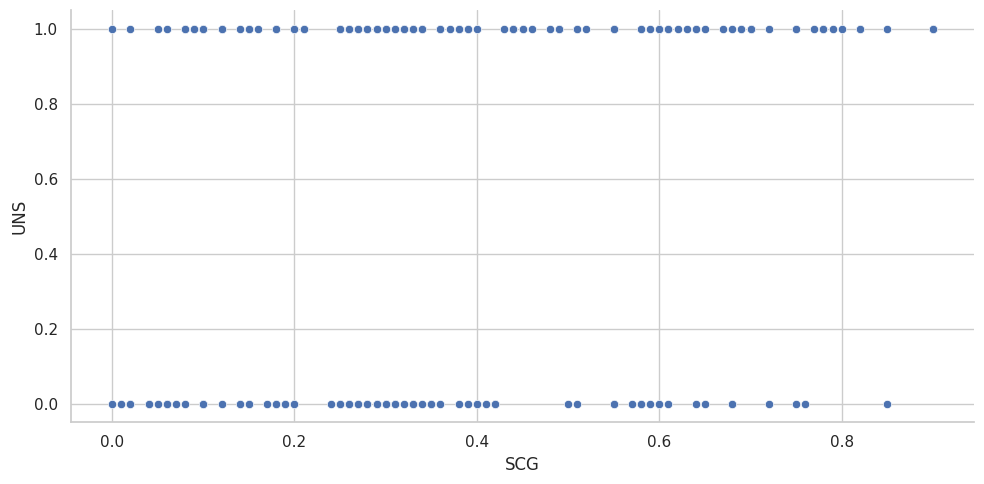

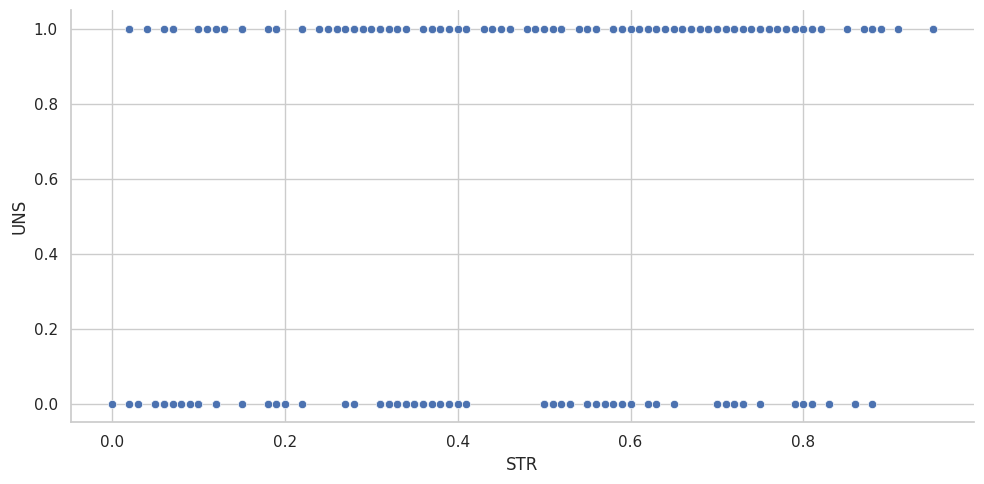

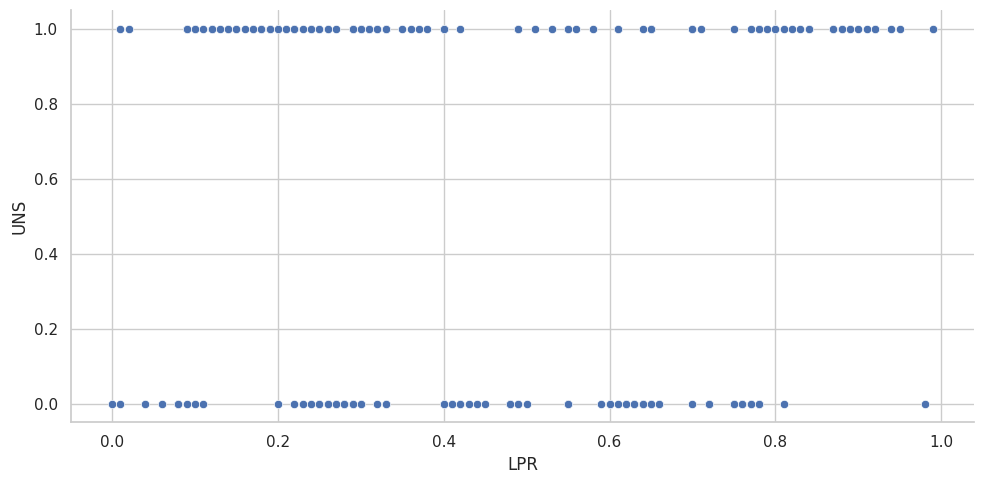

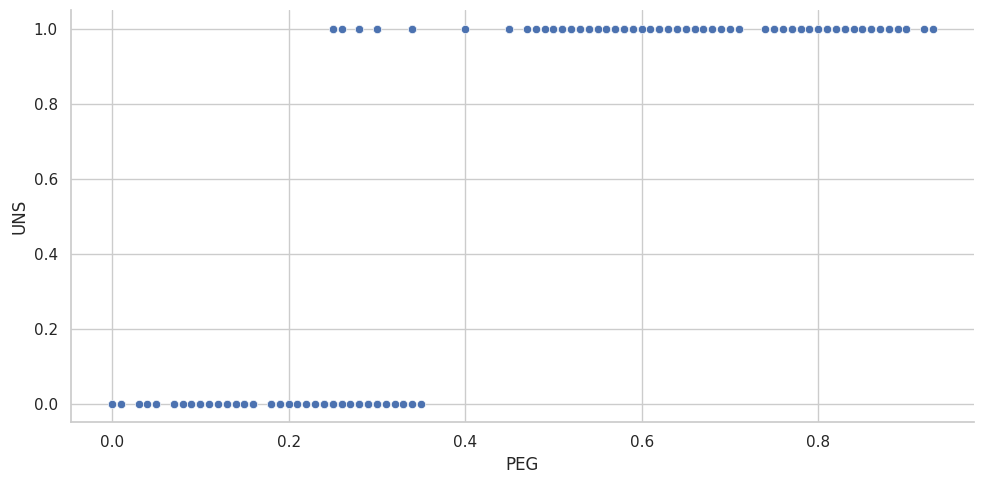

In [ ]:
for i in feat_cols:
  sns.relplot(x=i, y = 'UNS', data = students, kind='scatter', aspect = 2)

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** *первый график показыает, что сплит идёт по признаку PEG. График "значение признака - класс" показывает, что PEG почти идеально разбивает датасет на классы, следоательно, всё согласуется.*

*Признак PEG является "хорошим", а его кривая на первом графике чем-то похожа на нормальное распределение, имеет пик на значении оптимального разбиения. Для остальных признаков критерий Джини особо сильно не меняется, держится примерно на одном значении.*

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

 https://contest.yandex.ru/contest/56884/run-report/102927054/


Вставьте что угодно, описывающее ваши впечатления от этого задания:

<img
src = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRnnDYfwD1qK0t7HBs77PseDOLYqu2qIucojQ&usqp=CAU'
/>